In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Remove unnecessary variables from the excel sheet and focus only on meal, stays_in_weekend_nights and stays_in_week_nights

In [3]:
df=pd.read_excel(r"hotel_bookings.csv",usecols=['meal', 'stays_in_weekend_nights', 'stays_in_week_nights'])

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [5]:
df = pd.read_csv("hotel_bookings.csv")
df = df[['meal', 'stays_in_weekend_nights', 'stays_in_week_nights']]

In [6]:
df

,meal,stays_in_weekend_nights,stays_in_week_nights
0,BB,0,0
1,BB,0,0
2,BB,0,1
3,BB,0,1
4,BB,0,2
...,...,...,...
119389,BB,2,5
119390,BB,2,5
119391,BB,2,5
119392,BB,2,5


In [7]:
print("Data info:")
print(df.info())

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119394 entries, 0 to 119393
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   meal                     119394 non-null  object
 1   stays_in_weekend_nights  119394 non-null  int64 
 2   stays_in_week_nights     119394 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ MB
None


Check the original distribution of the 'meal' column before cleaning, so to find and remove any invalid values：undefined

In [8]:
print("Meal type distribution (before cleaning):")
meal_distribution = df['meal'].value_counts()
print(meal_distribution)
list_meal = meal_distribution.index.to_list()
print("Meal types as list:", list_meal)

Meal type distribution (before cleaning):
meal
BB           92313
HB           14464
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
Meal types as list: ['BB', 'HB', 'SC', 'Undefined', 'FB']


Data were cleaned to remove missing values, to filter for negative values of the intended total night, and to filter for invalid meal type. Finally, calculate and filter the total length of stay.

In [9]:
df = df.dropna(subset=['meal', 'stays_in_weekend_nights', 'stays_in_week_nights'])
df = df[(df['stays_in_weekend_nights'] >= 0) & (df['stays_in_week_nights'] >= 0)]
valid_meals = ['BB', 'HB', 'FB', 'SC']
df = df[df['meal'].isin(valid_meals)]
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df = df.loc[(df['total_nights'] > 0) & (df['total_nights'] <= 30)]

Verify that only valid data remains after cleaning the data

In [10]:
print("meal types (after cleaning):",
df['meal'].unique())

meal types (after cleaning): ['BB' 'FB' 'HB' 'SC']


Calculate the average number of days and number of occupancy, grouped by meal type

In [11]:
avg_nights = df.groupby('meal')['total_nights'].mean()
count = df.groupby('meal').size()
meal_stats = pd.DataFrame({
    'avg_nights': avg_nights,
    'count': count})
meal_stats = meal_stats.sort_values('avg_nights', ascending=False)
print("Meal type statistics (average nights and booking count):")
print(meal_stats)

Meal type statistics (average nights and booking count):
      avg_nights  count
meal                   
HB      4.345314  14384
FB      4.001255    797
BB      3.341359  91748
SC      2.933087  10566


In [12]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

A bar chart showing the difference in the number of days of occupancy in the meal type

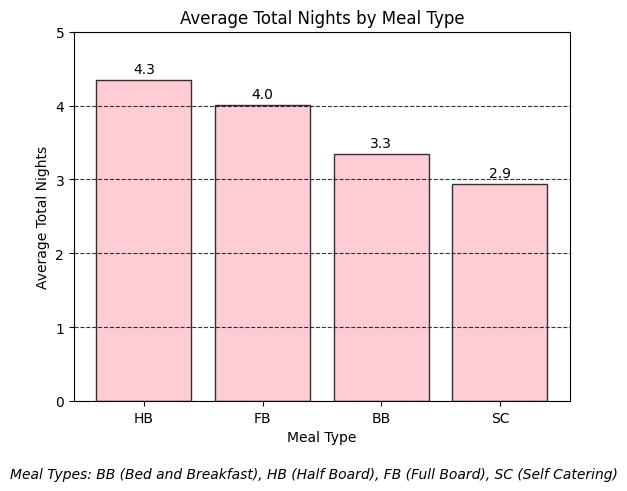

In [13]:
bars = plt.bar(meal_stats.index, meal_stats['avg_nights'], color='pink', alpha=0.8, width=0.8, edgecolor='black')
plt.title('Average Total Nights by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Total Nights')
plt.figtext(0.5, -0.05, 
            'Meal Types: BB (Bed and Breakfast), HB (Half Board), FB (Full Board), SC (Self Catering)', 
            ha='center', style='italic')
plt.grid(axis='y', linestyle='--', alpha=0.8, color='black')
labels = [round(height, 1) for height in meal_stats['avg_nights']]
plt.bar_label(bars, labels=labels, label_type="edge", padding=3, fontsize=10)
plt.ylim([0, 5])
plt.show()

## Mini Report Markdown

1. Business Question: 
What are the differences in the number of days of stay for customers choosing different meal types? 

2. Relevance:
Exploring the correlation between guests' meal type and the duration of their stay can optimize hotel management: based on the statistics of the length of time under a certain meal type, the hotel can optimizes its meal resources in advance to avoid wastage or shortage. Further, this analysis identifies the customer segments attracted to each package (market positioning), in order to design marketing strategies and meal content tailored to the different customer segments and to ensure guest loyalty.

3. Data Justification:
The independent variable is the meal, which directly reflects guests' dining choices: BB,HB,FB and SC. I summed the dependent variables of stays in weekend nights and stays in week nights into the total days of stay for more straightforward analysis.

4. Findings and Insights:
Guests who chose HB and FB types stayed longer on average, at 4.3 and 4 days. They are likely vacationers who want meal convenience. The hotel can develop local specialties and offer long-term specials (one free lunch for 6 days).  BB and SC guests are likely to be business travelers and do not have time to eat at the hotel, which stays an average of 3.3 and 2.9 days. The hotel should prioritize check-in efficiency.